<a href="https://colab.research.google.com/github/cornel-kim/samples/blob/DS/iriscluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
#For Jupyter Notebooks to show the plots
%matplotlib inline
#Importing the dataset
iris = pd.read_csv("https://www.modcom.co.ke/data/datasets/iris.csv")
iris

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
#Dropping the 'Species' column
iris_clustering = iris.drop(columns = ['class'])
#Selecting 2 random features from the dataset for clustering
#Here we choose Sepal Length @ column 0 and Petal Length @ column 2
X = iris_clustering.iloc[:, [0,2]].values

In [11]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
   kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
   kmeans.fit(X)
   #appending the WCSS to the list (kmeans.inertia_ returns the WCSS value for an initialized cluster)
   wcss.append(kmeans.inertia_)  

We graph the relationship between the number of clusters and Within Cluster Sum of Squares (WCSS) then we select the number of clusters where the change in WCSS begins to level off (elbow method).
WCSS is defined as the sum of the squared distance between each member of the cluster and its centroid.
 To get the values used in the graph, we train multiple models using a different number of clusters and storing the value of the intertia_ property (WCSS) every time.

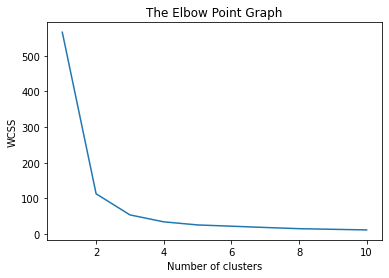

In [8]:
#Plotting The Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
#Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)

#Returns a label for each data point based on the number of clusters
y = kmeans.fit_predict(X)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


Next, we’ll categorize the data using the optimum number of clusters (3) we determined in the last step. k-means++ ensures that you get don’t fall into the random initialization trap.

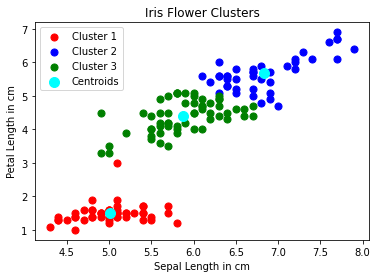

In [10]:
# Visualising the clusters
#Scatter plotting for (x,y) with label 1 as Cluster 1 in color c = red and points in size s = 50
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
#Scatter plotting for (x,y) with label 2 as Cluster 2 in color c = blue and points in size s = 50
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
#Scatter plotting for (x,y) with label 3 as Cluster 3 in color c = green and points in size s = 50
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 50, c = 'green', label = 'Cluster 3')

#Scatter plotting the centroids with label = 'Centroids' in color c = cyan and points in size s = 100
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'cyan', label = 'Centroids')

plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.legend()
plt.show()